<a id='section_id3'></a>
<B>Simple example of VQE</B>

We calculate the ground-state of a qubit in an external magnetic field. The Hamiltonian is $$ H = -B Z $$ where B is the magnetic field strength and Z is the Pauli Z operator.

Adapted from https://pennylane.ai/qml/demos/tutorial_qubit_rotation/

----------

By Damian Pope, PhD

<i>Introduction to Quantum  Machine Learning</i> lecture




In [1]:
!pip install pennylane

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pennylane as qml
from pennylane import numpy as np

# importing the required module
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=1)

#magnetic field strength
B = 2

@qml.qnode(dev)
def circuit(theta):
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

Set the initial value of the angle theta.

Note that as we wish to "train" the angle, we need to set **requires_grad=True**

In [3]:
#initialize value of theta
theta = np.array([np.pi/2],requires_grad=True)

#define a function that returns the energy that we want to minimize
def energy(x):
    return -B*circuit(x)

    if (i + 1) % 5 == 0:
        print(f"i={i}   Energy ={energy(theta)}")


print("Initial rotation angle: {}".format(theta))

Initial rotation angle: [1.57079633]


Create the classical optimization procedure using gradient descent & then run it.

In [4]:
#initialise the optimizer
optimizer = qml.GradientDescentOptimizer(stepsize = 0.02)

# set the number of steps
steps = 200

store_theta=[theta]
store_energy=[energy(theta)]

tol = 1e-04

for i in range(steps):
    # update the circuit parameters
    theta = optimizer.step(energy,theta)

    store_theta.append(theta)
    store_energy.append(energy(theta))

    conv = np.abs(store_energy[-1] - store_energy[-2] )

    if conv <= tol:
       print("total number of steps=",steps)
       break

total number of steps= 200


Plot the results to see how the energy changes with successive iterations & settles down to the ground state energy. Note that, of course, the final value of theta is approximately equal to Pi. This corresponds to the spin down or |1> state.

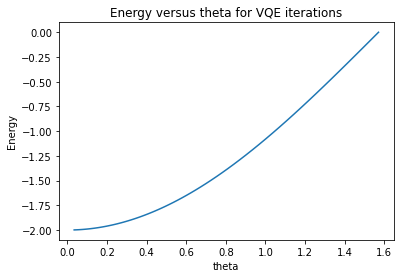

In [5]:
#graph results

# plotting the points
plt.plot(store_theta, store_energy)

# naming the x axis
plt.xlabel('theta')
# naming the y axis
plt.ylabel('Energy')

# giving a title to my graph
plt.title('Energy versus theta for VQE iterations')

# function to show the plot
plt.show()